In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def update_weights(X,W):
    for x in X:
        W += np.outer(x,x)
    for i in range(W.shape[0]):
        W[i,i] = 0
    return W

def recall(x,W):
    
    x = x.reshape((-1,1))
    #print(x)
    #print(W.shape)
    #x = np.sign(np.matmul(W.T,x))
    
    for i in range(x.shape[0]):
        x[i] = np.sign(np.dot(x.T,W[i,:]))
    return x


def find_pattern(x, W, epochs):
    for i in range(epochs):
        x = recall(x,W)
    return x

def calculate_energy(x,W):
    E_s = np.zeros(W.shape[0])
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            E_s[i] = E_s[i] + W[i,j]*x[i]*x[j]
    E = - np.sum(E_s)
    return E

(11264,)
(11, 1024)
(4, 1024)
[-1 -1 -1 ... -1 -1 -1]
0.0  procent noise.
9.9  procent noise.
19.9  procent noise.
29.9  procent noise.
39.9  procent noise.
49.9  procent noise.


ValueError: x and y must have same first dimension, but have shapes (10,) and (6,)

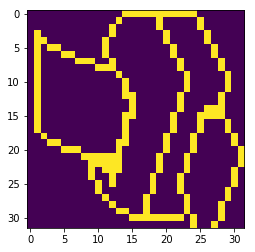

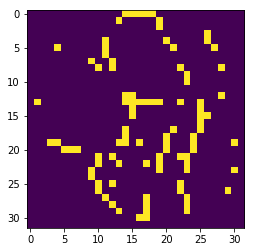

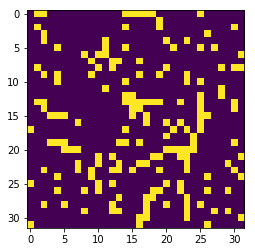

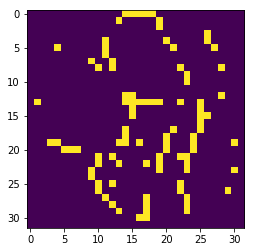

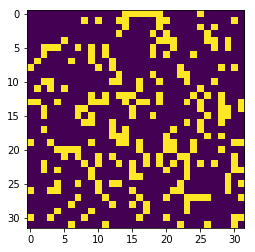

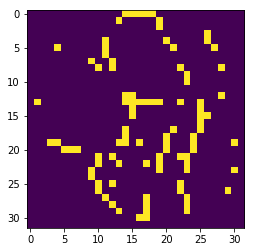

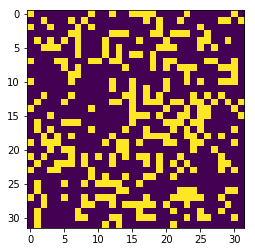

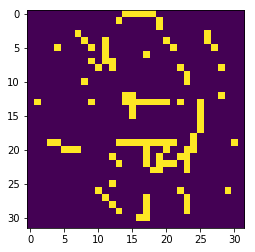

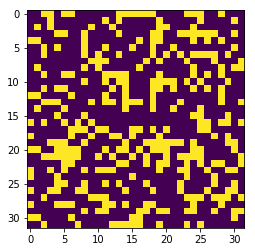

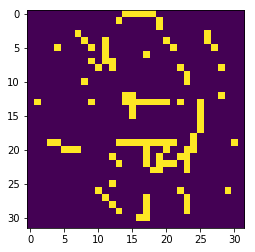

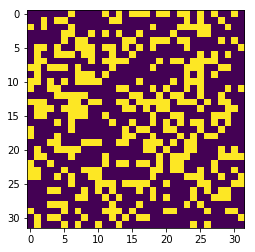

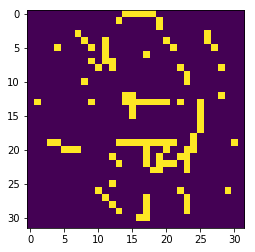

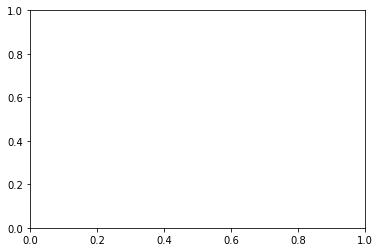

In [6]:
data = np.loadtxt('pict.dat',delimiter=",", dtype=int)
print(data.shape)
data = data.reshape(-1,1024)
print(data.shape)
#to start with learn the first three
train_X = data[0:4].copy()
print(train_X.shape)
print(data[0])
W = np.zeros((train_X.shape[1],train_X.shape[1]))
W = update_weights(train_X,W)

x = data[0]

#print(x)
epochs = 10
energy_s = np.zeros(10)
for i in range(0,1000,100):
    for i in range(i):
        index = np.random.randint(0,x.shape[0])
        x[index] = -x[index]
    plt.figure()
    plt.imshow(x.reshape((32,32)))
    x = find_pattern(x,W,epochs)
    print(i/10," procent noise.")
    plt.figure()
    plt.imshow(x.reshape((32,32)))
    E = calculate_energy(x,W)
    energy_s[int(i/100)] = E
plt.figure()
plt.plot(np.arange(10),energy_s)

(11264,)
(11, 1024)
With  3  number of images
(3, 1024)
[-1 -1 -1 ... -1 -1 -1]
10  procent noise.
With  4  number of images
(4, 1024)
[-1 -1 -1 ... -1 -1 -1]
10  procent noise.
With  5  number of images
(5, 1024)
[-1 -1 -1 ... -1 -1 -1]
10  procent noise.
With  6  number of images
(6, 1024)
[-1 -1 -1 ... -1 -1 -1]
10  procent noise.
With  7  number of images
(7, 1024)
[-1 -1 -1 ... -1 -1 -1]
10  procent noise.


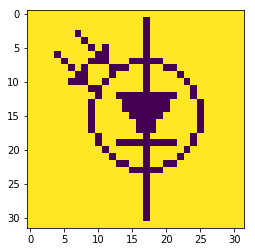

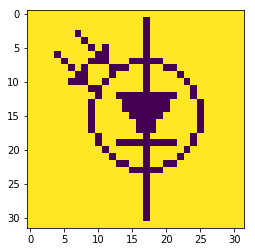

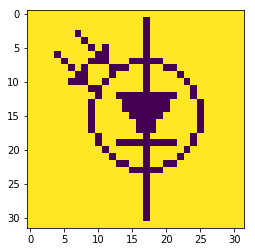

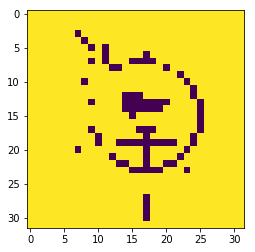

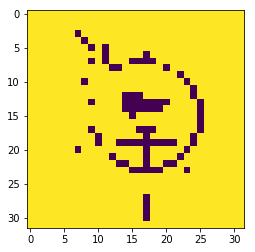

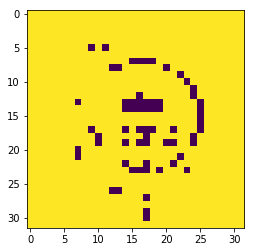

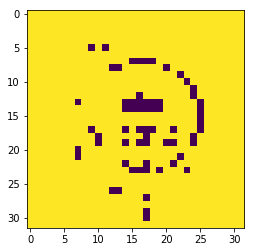

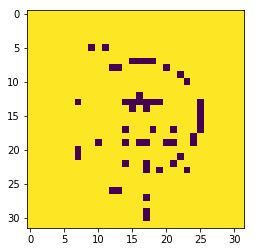

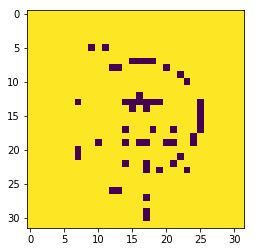

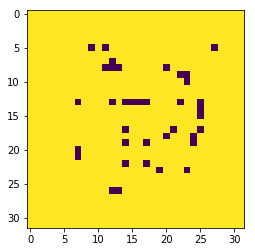

In [13]:
data = np.loadtxt('pict.dat',delimiter=",", dtype=int)
print(data.shape)
data = data.reshape(-1,1024)
print(data.shape)
#to start with learn the first three
for j in range(3,8):
    print("With ", j, " number of images")
    train_X = data[0:j].copy()
    print(train_X.shape)
    print(data[0])
    W = np.zeros((train_X.shape[1],train_X.shape[1]))
    W = update_weights(train_X,W)

    x = data[2]

    #print(x)
    epochs = 10

    #for i in range(10):
    #    index = np.random.randint(0,x.shape[0])
    #    x[index] = -x[index]
    plt.figure()
    plt.imshow(x.reshape((32,32)))
    x = find_pattern(x,W,epochs)
    print(10," procent noise.")
    plt.figure()
    plt.imshow(x.reshape((32,32)))

Typ när vi har fler än 5 bilder så börjar den klassificera fel utan noise. Med lite noise kan vi ha ungefär 4 bilder.